<a href="https://colab.research.google.com/github/THEABHASHARMA/CASE-STUDIES/blob/main/Match_IQR_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IQR implementation on a real-life dataset and Compare Sehwag's and Dravid's match performace

# Problem Statement:
When we talk about these two players:

Sehwag
Rahul Dravid
We all know that Sehwag has aggressive batting style

While Rahul Dravid plays patiently, with no risk and stands on the crease like a "Wall"

Let's analyse both of their matches and try to find some insights about their range of scores.

We will use IQR here to calculate the range of their scores accurately and will also try to find if they have any "Outlier" scores in their careers.

# We will conclude that out of these two batsman, who is the more consistent batsman?

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Let's start with Sehwag's matches

In [ ]:
!wget --no-check-certificate https://drive.google.com/uc?id=1JYyGv7QSb_GkVGan5rnHNrtOg2ewJB_f -O sehwag.csv

--2024-04-25 07:10:54--  https://drive.google.com/uc?id=1JYyGv7QSb_GkVGan5rnHNrtOg2ewJB_f
Resolving drive.google.com (drive.google.com)... 172.253.62.101, 172.253.62.102, 172.253.62.139, ...
Connecting to drive.google.com (drive.google.com)|172.253.62.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1JYyGv7QSb_GkVGan5rnHNrtOg2ewJB_f [following]
--2024-04-25 07:10:54--  https://drive.usercontent.google.com/download?id=1JYyGv7QSb_GkVGan5rnHNrtOg2ewJB_f
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.31.132, 2607:f8b0:4004:c0b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.31.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18584 (18K) [application/octet-stream]
Saving to: ‘sehwag.csv’

sehwag.csv          100%[===================>]  18.15K  --.-KB/s    in 0s      

2024-04-25 07:10:55 (67.7 MB/s) - ‘seh

In [ ]:
sehwag = pd.read_csv("sehwag.csv")
sehwag.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Unnamed: 9,Opposition,Ground,Start Date,Unnamed: 13
0,1,5,2,0,0,50.00,7,lbw,1,NaN,v Pakistan,Mohali,1 Apr 1999,ODI # 1427
1,19,18,24,0,1,79.16,6,caught,1,NaN,v Zimbabwe,Rajkot,14 Dec 2000,ODI # 1660
2,58,62,54,8,0,107.40,6,bowled,1,NaN,v Australia,Bengaluru,25 Mar 2001,ODI # 1696
3,2,7,7,0,0,28.57,6,caught,2,NaN,v Zimbabwe,Bulawayo,27 Jun 2001,ODI # 1730
4,11,19,16,1,0,68.75,6,not out,2,NaN,v West Indies,Bulawayo,30 Jun 2001,ODI # 1731


In [ ]:
sehwag["Runs"].describe()

count    245.000000
mean      33.767347
std       34.809419
min        0.000000
25%        8.000000
50%       23.000000
75%       46.000000
max      219.000000
Name: Runs, dtype: float64

We want to find the range of his scores

In [ ]:
# So Q1, Q2 and Q3 will be
# 25th percentile or Q1
p_25 = np.percentile(sehwag["Runs"], 25)

#50th percentile or Q2, also "Median"
p_50 = np.percentile(sehwag["Runs"], 50)


#75th percentile or Q3
p_75 = np.percentile(sehwag["Runs"], 75)
print(p_25, p_50, p_75)

8.0 23.0 46.0


# P_25 = 8.0
This value indicates that 25% of all the values present in the dataset for Sehwag's run is less than 8

We can also say,

Out of all the matches that Shewag played, in 25% of those matches, he scored less than 8 runs.

# P_50 = 23.0

This indicates that in 50% of the matches, he scored less than 23 runs

# P_75=46.0

This indicates that in 75% of the matches, he scored less than 46 runs

# IQR

We know IQR = Q3 - Q1

In [ ]:
# Inter Quartile Range
iqr_sehwag = p_75 - p_25
iqr_sehwag

38.0

In [ ]:
normal_range = (sehwag["Runs"].max() - sehwag["Runs"].min())

normal_range

219

We can observe the difference here,

IQR is 38 which means that middle 50% of the data lies in the range of 38.

So more than 50% of the time, Sehwag scores in the range of 38 runs


On the other hand, the normal range is very high i.e. 219 which is certainly not a good range to consider.

We can observe one thing that there in an Outlier present in the data means in some matches he has scored so many runs like more than 300 in a single match

This is why the range is getting affected by the outlier



# Let's plot the box plot to visualise the spread of the data

<Axes: xlabel='Runs'>

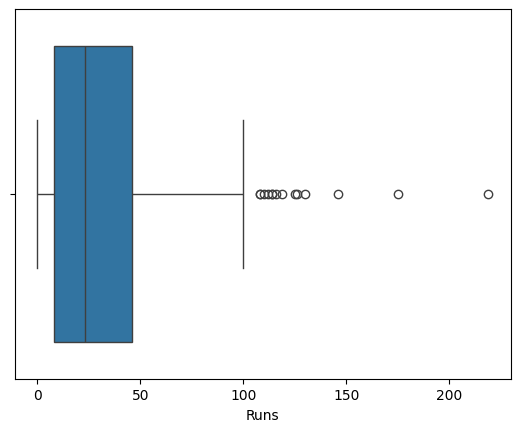

In [ ]:
sns.boxplot(data=sehwag["Runs"], orient="h")

We can see that Q1, Q2, and Q3 values lie within the box and we can also see whiskers on both the sides of box which is the limit.

We already saw how to calculate the lower whisker and upper whisker

All the values outside the limit are considered "Outlier"

In [ ]:
# upper limit = Q3 + 1.5 * IQR

upper = 46 + 1.5*(iqr_sehwag)
upper

103.0

# Note:

Here, we cannot have values on the left side of the lower whisker as the batsman cannot score less than 0 runs.

So all the outliers will be present on the right side of the upper whisker

In [ ]:
# all the values greater than upper is outlier
outliers_sehwag = sehwag[sehwag["Runs"]>upper]
len(outliers_sehwag)

14

In [ ]:

len(outliers_sehwag)/len(sehwag["Runs"])

0.05714285714285714

# Conclusion:

Here we can observe that 5.7% values from the dataset are outliers.

This means we can conclude that 5.7 or ~6% times Sehwag has scored more than the UPPER LIMIT which is 103.0 runs

# Now let's have a same process into Dravid's stats

In [ ]:
!wget --no-check-certificate https://drive.google.com/uc?id=1nrKmOYQNiTqFhMIoAwE00ULKhGhMEVMZ -O dravid.csv

--2024-04-25 07:40:21--  https://drive.google.com/uc?id=1nrKmOYQNiTqFhMIoAwE00ULKhGhMEVMZ
Resolving drive.google.com (drive.google.com)... 142.251.167.100, 142.251.167.138, 142.251.167.113, ...
Connecting to drive.google.com (drive.google.com)|142.251.167.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1nrKmOYQNiTqFhMIoAwE00ULKhGhMEVMZ [following]
--2024-04-25 07:40:21--  https://drive.usercontent.google.com/download?id=1nrKmOYQNiTqFhMIoAwE00ULKhGhMEVMZ
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.31.132, 2607:f8b0:4004:c0b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.31.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24177 (24K) [application/octet-stream]
Saving to: ‘dravid.csv’

dravid.csv          100%[===================>]  23.61K  --.-KB/s    in 0s      

2024-04-25 07:40:22 (101 MB/s) - ‘

In [ ]:
dravid = pd.read_csv("dravid.csv")

In [ ]:
dravid["Runs"].describe()

count    318.000000
mean      34.242138
std       29.681822
min        0.000000
25%       10.000000
50%       26.000000
75%       54.000000
max      153.000000
Name: Runs, dtype: float64

In [ ]:
#25th percentile or Q1
per_25 = np.percentile(dravid["Runs"], 25)


#50th percentile or Q2 , also "Median"
per_50 = np.percentile(dravid["Runs"], 50)


#75th percentile or Q3
per_75 = np.percentile(dravid["Runs"], 75)
per_75

print(p_25,p_50,p_75)

8.0 23.0 46.0


# p_25
This indicates that in 25% of the matches, he scored less than 10 runs

# p_50
This indicates that in 50% of the matches, he scored less than 26 runs

# p_75
This indicates that in 75% of the matches, he scored less than 54 runs

# IQR

In [ ]:
# Inter Quartile Range
iqr_dravid = per_75 - per_25
iqr_dravid

44.0

In [ ]:
normal_range = (dravid["Runs"].max() - dravid["Runs"].min())

normal_range

153

We can observe the difference here,

IQR is 44 which means that middle 50% of the data lies in the range of 44.

So more than 50% of the time, David scores in the range of 44 runs

On the other hand, the normal range is very high i.e. 153 which is certainly not a good range to consider.


This is why the range is getting affected by the outlier

# BOXPLOT

<Axes: xlabel='Runs'>

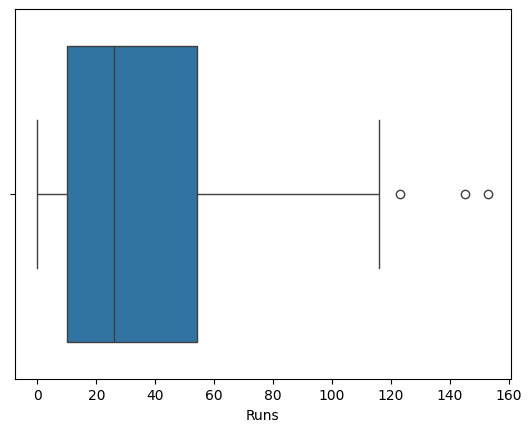

In [ ]:
 sns.boxplot(data=dravid["Runs"], orient="h")

In [ ]:
# upper limit = Q3 + 1.5 * IQR

upper_dravid = per_75 + 1.5*(iqr_dravid)
upper_dravid

120.0

In [ ]:
# all the values greater than upper is outlier
outliers_dravid = dravid[dravid["Runs"]>upper_dravid]
len(outliers_dravid)/len(dravid)

0.009433962264150943

# Conclusion
Here we can observe that 0.9% values from the dataset are outliers.

This means we can conclude that 0.9% times Dravid has scored more than the IQR which is 44 runs


So we can conclude that in Sehwag case there is 6% outliers and in Dravid's case there are only 0.9% outliers

# which shows that "**Dravid was more consistent than Sehwag"**



# Now let's calculate the standard deviation through which we can measure the amount of variation or dispersion in runs scored by Sachin and Dravid-

In [ ]:
std_dev_sehwag = np.std(sehwag["Runs"])

print("The amount of variations in runs scored by sehwag is:",std_dev_sehwag)

The amount of variations in runs scored by sehwag is: 34.73830672594385


In [ ]:
std_dev_dravid = np.std(dravid["Runs"])

print("The amount of variations in runs scored by dravid is:",std_dev_dravid)

Lower standard deviation indicates less variability in the batsman's performance.

For Sehwag:

Standard Deviation of Runs: 34.74.
For Dravid:

Standard Deviation of Runs: 29.64

# Conclusion:

Dravid has a lower standard deviation compared to Sehwag.

This suggests that Dravid's run scores are more consistent or less variable than Sehwag's.

In other words, Dravid tends to have a more stable performance in terms of runs compared to Sehwag, who shows more variability in his run scores.

So, from both IQR method and measuring Standard Deviation we can conclude that Dravid is more consitent then Sehwag

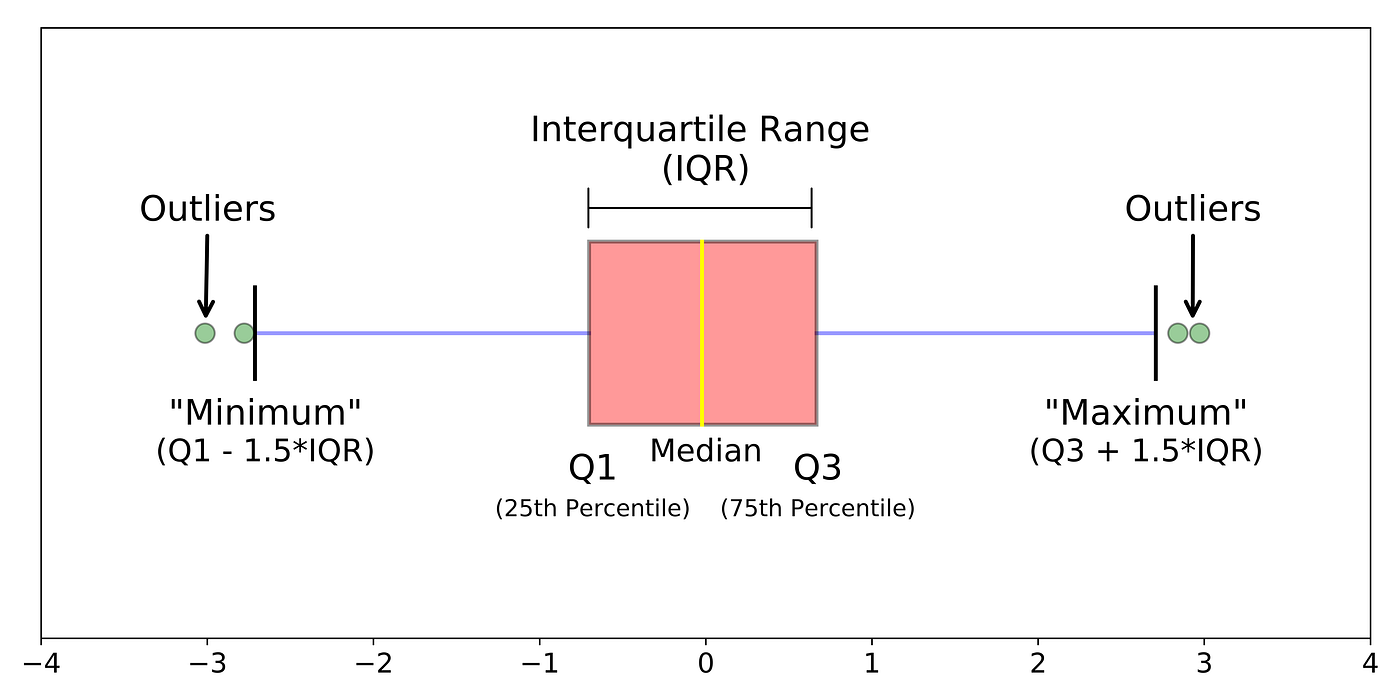